Activity 2: CSE Demographics (4 Points)
=======================

By: Ryan Karl


1) Overview:
------------------------------
    
For this assignment, I requested a .csv file containing data regarding the gender and race of ND CSE students
using Python, and then parsed through the data to generate two tables displaying the data in a more visually appealing
format.  To do this, I learned how to use the requests library to interact with networks using Python, and also
used the matplotlib library to generate a stacked bar graph and a stackplot to render the data.  After spending a 
long time trying to accomplish this assignment with a list rather than a dictionary, I discovered the 
importance of carfully thinking out what data structures to use when approaching a data parsing problem.  My main
takeaway was the usefulness of the Jupyter tool when programming in Python, and after being exposed to it I will
certainly use it more in the future.

2) Methodology: 
---------------------------------------------------------------

Note the code used for this assignment immediately follows this cell.  To accomplish these tasks, I first stored the URL as a string into a variable, and used the requests.get() command to ask for the data.  I then split the lines of the text and placed them into a list by using the .splitlines() command.  I then iterated through the text from the first line while delimitting by commas to pull the individual years and place them into a dictionary by using a for loop.   After this, I used a for loop to iterate through the rest of the lines delimmiting by commas to take the gender and race information for each student and count whether or not to increment the count of a gender or race category.  Note I used the enumerate function to simplify this process, and also used the sorted command to organize the data based on keys.  After this, I called the provided plot_gender_pct function to generate the first plot about gender, and called a function I wrote to generate the second plot about race.  In general, my function follows the format of the one given, but I of course use more fields to represent all of the races recorded, and also instead of defining axes attributes, I simply call the stackplot function, define labels using a string stored into a variable, and use the legend function to generate a legend.
        
        

In [3]:
# Imports

import matplotlib.pyplot as plt
import collections
import requests
import numpy as np

#Function to plot gender
def plot_gender_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years   = sorted(data.keys())
    males   = []
    females = []
    for year in years:
        m = data[year]['M']
        f = data[year]['F']
        t = m + f
        males.append(m * 100.0 / t)
        females.append(f * 100.0 / t)

    ax.bar(years, females, color='r', label='Female')
    ax.bar(years, males, bottom=females, color='b', label='Male')

    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

#Function to plot race    
def plot_race_pct(data):
    fig, ax = plt.subplots(1,1,figsize=(10, 8))
    years   = sorted(data.keys())
    
    #Create new lists for each race
    Caucasian = []
    Asian = []
    Hispanic = []
    African_American = []
    Native_American_Pacific_Islanders = []
    Multiple_Selection = []
    Undeclared = []
    
    #Check whether particular race is represented in dictionary
    for year in years: 
        if 'C' not in data[year].keys():
            c = 0
        else:
            c = data[year]['C']
        if 'O' not in data[year].keys():
            o = 0
        else:
            o = data[year]['O']
        if 'S' not in data[year].keys():
            s = 0
        else:
            s = data[year]['S']
        if 'B' not in data[year].keys():
            b = 0
        else:
            b = data[year]['B']
        if 'N' not in data[year].keys():
            n = 0
        else:
            n = data[year]['N']
        if 'T' not in data[year].keys():
            t = 0
        else:
            t = data[year]['T']
        if 'U' not in data[year].keys():
            u = 0
        else:
            u = data[year]['U']
        
        #Calculate the percentages of each race
        total = c + o + s + b + n + t + u
        Caucasian.append(c * 100.0 / total)
        Asian.append(o * 100.0 / total)
        Hispanic.append(s * 100.0 / total)
        African_American.append(b * 100.0 / total)
        Native_American_Pacific_Islanders.append(n * 100.0 / total)
        Multiple_Selection.append(t * 100.0 / total)
        Undeclared.append(u * 100.0 / total)

    #Generate plot with labels
    labels=('Caucasian', 'Asian', 'Hispanic', 'African American', 'Native American / Pacific Islanders', 'Multiple Selection', 'Undeclared')
    plt.stackplot(years, Caucasian, Asian, Hispanic, African_American, Native_American_Pacific_Islanders, Multiple_Selection, Undeclared, labels=labels)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.show()

#TODO: Fetch demographic data
url = 'https://www3.nd.edu/~pbui/teaching/cse.20289.sp18/static/csv/demographics.csv'

lines = requests.get(url)

#Remove newlines
columns = lines.text.splitlines()
data = {}
    
#TODO: Extract years from header line (ie. first line)
header = columns[0].split(',')    
for year in header:
    if year != '':
        data[year] = {}

#TODO: Extract data corresponding to each year (ie. remaining lines)
for line in columns[1:]:
    entries = line.split(',')
    
    #Use enumerate to iterate through dictionary and count whether a gender or race is represented
    for i, year in enumerate(sorted(data.keys())):

        #Check gender attributes
        gender = entries[2*i]

        if gender != '':
            if gender not in data[year].keys():
                data[year][gender] = 0
            data[year][gender] += 1

        #Check race attributes
        ethnicity = entries[2*i + 1]
        
        if ethnicity != '':
            if ethnicity not in data[year].keys():
                data[year][ethnicity] = 0
            data[year][ethnicity] += 1



3) Analysis(graphs below): 
---------------------------------------------------------------

a) What is the overall trend in gender balance in the Computer Science and Engineering program at the University of Notre Dame?

        Based on the gender graph, it appears the gender balance has tended to improve other the past several years. 
        From 2015 to 2019 the number of women enrolling in the program increased every year, and even though the year
        2020 doesn't follow this trend this might be an outlier and more sampling should be done in the future to 
        determine if this indicates steady decline.


b) How has ethnic diversity changed over time in the Computer Science and Engineering program at the University of Notre Dame?    

        Based on the gender graph, it appears the diversity of ND has tended to remain the same over the past several years. 
        In general, Caucasians tend to dominate enrollment numbers at a steady rate (~70%), but interestingly the
        other minorities such as Native Americans / Pacific Islanders have experienced growth.

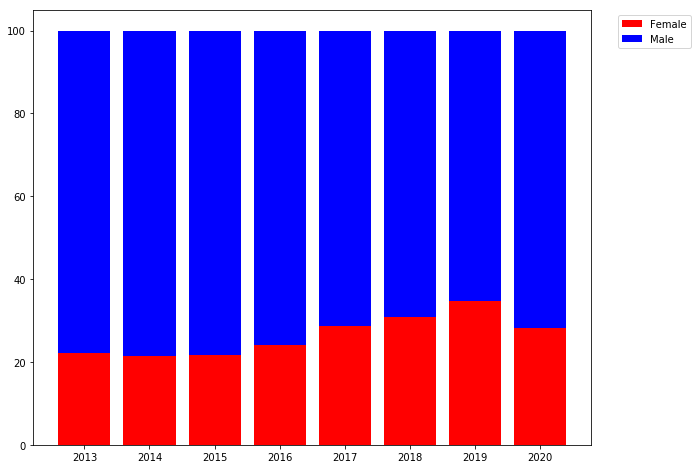

In [6]:
plot_gender_pct(data)

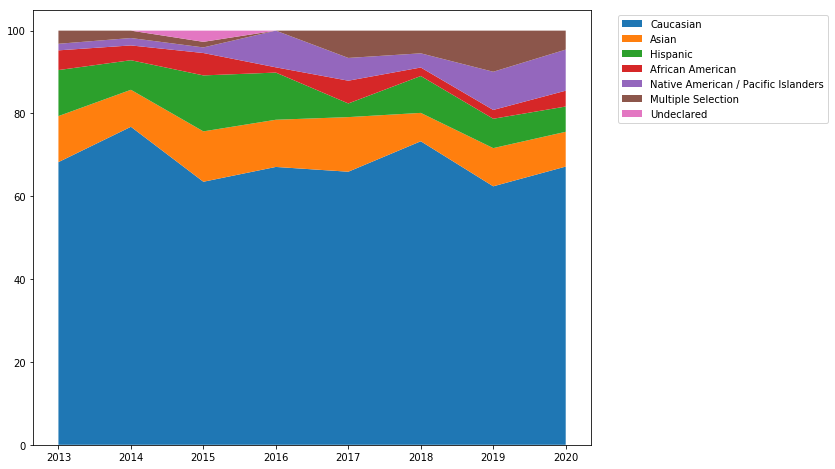

In [7]:
plot_race_pct(data)

Discussion:
------------------------------------------

1) Does the Computer Science and Engineering department provide a welcoming and supportive learning environment to all students? In what ways can it improve?

    Based on my own experience at Notre Dame, it seems the department provides an excellent environment for all students.
    All of the professors and TAs I have interacted with have been very kind and happy to help any student better understand 
    topics discussed in class.  Also, there are a number of clubs to promote social engagement among all students, such the 
    Linux Users Group among others, and all of the participants seem very welcoming to all new members whatever their 
    background.  In general, I don't feel any improvements can be made, but I do hope that the deparement continues its
    excellent work building an inclusive community.